In [1]:
#Steps we Take:
#Read FLight Data
#Convert time o standard format
#Convert Data to
#Convert Nan to numeric 0
import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
import datetime
import time
from time import strftime, gmtime
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from random import sample
from sklearn.metrics import mean_absolute_error
import random
import seaborn as plotGraphway1
from sklearn.metrics import accuracy_score

#Note: The above code has many different libraries some for classifiers and some for regression.
#In the prediction model we are using regression models so ignore other. I haven't touched other because everything is running 
#fine

**Some Steps we will take:**
1. Read Flight and Airline Data
2. Convert time in standard format
3. Convert Cancellation Reason column to Numeric Values for our own ease.
4. Convert Nan to numeric 0
5. Added a new Column for Delayed Status True or False just for more clarity
6. Merged the Airline Names with the Flights csv file for our own benefit.
7. Predict the Flight Delays using Random Forest Regression
8. Train, Validate and then Test with random datasets.
9. Visualize the Data by viewing different reasons of Delay

    a. Which Airline had more delays.
    
    b. Which Feature Value was most important in Regression Modelling.
    
    c. Graphs between Actual and Predicted Values



In [4]:
flightData=pd.read_csv("flights.csv")
airlineData = pd.read_csv('airlines.csv')

In [5]:
flightData.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#CONVERT THE TIME TO STANDARD FORMAT
# Function replace 24:00 O'Clock with 00:00 O'Clock:
def timeConvert(val):
    
    if pd.isnull(val):
        
        return np.nan
    else:
            
        if val == 2400:
            val = 0
           
        val = "{0:04d}".format(int(val))
            
        newFormat = datetime.time(int(val[0:2]), int(val[2:4]))
        
    return newFormat

In [7]:
flightData['WHEELS_OFF'] = flightData['WHEELS_OFF'].apply(timeConvert)
flightData['ARRIVAL_TIME'] = flightData['ARRIVAL_TIME'].apply(timeConvert)
flightData['DEPARTURE_TIME'] = flightData['DEPARTURE_TIME'].apply(timeConvert)
flightData['WHEELS_ON'] = flightData['WHEELS_ON'].apply(timeConvert)
flightData['SCHEDULED_ARRIVAL'] = flightData['SCHEDULED_ARRIVAL'].apply(timeConvert)
flightData['SCHEDULED_DEPARTURE'] =flightData['SCHEDULED_DEPARTURE'].apply(timeConvert)


We need numeric data for our model. So we convert values in CANCELLATION_REASON columns into Numeric form
1 -> A, 2 -> B, 3-> C, 4 -> D


In [8]:

flightData.loc[flightData['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
flightData.loc[flightData['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
flightData.loc[flightData['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
flightData.loc[flightData['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4



 We wil now convert Nan(Nulls) to Numeric 0.

In [9]:
flightData['SECURITY_DELAY'] = flightData['SECURITY_DELAY'].fillna(0)
flightData['CANCELLATION_REASON'] = flightData['CANCELLATION_REASON'].fillna(0)
flightData['AIRLINE_DELAY'] = flightData['AIRLINE_DELAY'].fillna(0)
flightData['LATE_AIRCRAFT_DELAY'] = flightData['LATE_AIRCRAFT_DELAY'].fillna(0)
flightData['WEATHER_DELAY'] =flightData['WEATHER_DELAY'].fillna(0)
flightData['AIR_SYSTEM_DELAY'] = flightData['AIR_SYSTEM_DELAY'].fillna(0)
#Dropping rest of the nulls
flightData = flightData.dropna(axis=0)

In [10]:
#Checking the Nulls.
flightData.isnull().sum()

YEAR                    0
MONTH                   0
DAY                     0
DAY_OF_WEEK             0
AIRLINE                 0
FLIGHT_NUMBER           0
TAIL_NUMBER             0
ORIGIN_AIRPORT          0
DESTINATION_AIRPORT     0
SCHEDULED_DEPARTURE     0
DEPARTURE_TIME          0
DEPARTURE_DELAY         0
TAXI_OUT                0
WHEELS_OFF              0
SCHEDULED_TIME          0
ELAPSED_TIME            0
AIR_TIME                0
DISTANCE                0
WHEELS_ON               0
TAXI_IN                 0
SCHEDULED_ARRIVAL       0
ARRIVAL_TIME            0
ARRIVAL_DELAY           0
ARRIVAL_DELAY_STATUS    0
DIVERTED                0
CANCELLED               0
ON_TIME                 0
Y                       0
CANCELLATION_REASON     0
AIR_SYSTEM_DELAY        0
SECURITY_DELAY          0
AIRLINE_DELAY           0
LATE_AIRCRAFT_DELAY     0
WEATHER_DELAY           0
dtype: int64

We'll now join/merge the Airlines with the Flight through IATA Code

In [11]:
flightData = flightData.merge(airlineData, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

flightData 

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,00:45:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,00:50:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,01:15:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
5,2015,1,1,4,AS,134,N464AS,ANC,SEA,01:55:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
6,2015,1,1,4,AS,144,N514AS,ANC,PDX,02:00:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
7,2015,1,1,4,AS,114,N303AS,ANC,SEA,02:20:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
8,2015,1,1,4,AS,695,N607AS,GEG,SEA,05:00:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.
9,2015,1,1,4,AS,730,N423AS,ANC,SEA,05:05:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,AS,Alaska Airlines Inc.


In [12]:
flightData  = flightData .drop(['AIRLINE_x','IATA_CODE'], axis=1)
flightData  = flightData .rename(columns={"AIRLINE_y":"AIRLINE"})


In [13]:
flightData 

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,CANCELLED,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,00:25:00,00:24:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,00:45:00,00:41:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,00:50:00,00:46:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,01:15:00,01:07:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
5,2015,1,1,4,134,N464AS,ANC,SEA,01:55:00,01:40:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
6,2015,1,1,4,144,N514AS,ANC,PDX,02:00:00,01:50:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
7,2015,1,1,4,114,N303AS,ANC,SEA,02:20:00,02:09:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
8,2015,1,1,4,695,N607AS,GEG,SEA,05:00:00,04:56:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.
9,2015,1,1,4,730,N423AS,ANC,SEA,05:05:00,04:57:00,...,0,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.


In [14]:
flightData ['isDELAY'] = flightData .loc[:,'ARRIVAL_DELAY'].values > 0
flightData

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,ON_TIME,Y,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,isDELAY
0,2015,1,1,4,98,N407AS,ANC,SEA,00:05:00,23:54:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
1,2015,1,1,4,135,N527AS,SEA,ANC,00:25:00,00:24:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
2,2015,1,1,4,108,N309AS,ANC,SEA,00:45:00,00:41:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
3,2015,1,1,4,122,N413AS,ANC,PDX,00:50:00,00:46:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
4,2015,1,1,4,130,N457AS,FAI,SEA,01:15:00,01:07:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
5,2015,1,1,4,134,N464AS,ANC,SEA,01:55:00,01:40:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
6,2015,1,1,4,144,N514AS,ANC,PDX,02:00:00,01:50:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
7,2015,1,1,4,114,N303AS,ANC,SEA,02:20:00,02:09:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
8,2015,1,1,4,695,N607AS,GEG,SEA,05:00:00,04:56:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False
9,2015,1,1,4,730,N423AS,ANC,SEA,05:05:00,04:57:00,...,1,3,0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,False


# Predicting Flight Delays using Random Forest

In [15]:

features = [
    'YEAR','MONTH','DAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','AIR_SYSTEM_DELAY','WEATHER_DELAY','ELAPSED_TIME'
    ,'DEPARTURE_DELAY','SCHEDULED_TIME','AIR_TIME','DISTANCE','TAXI_IN','TAXI_OUT','DAY_OF_WEEK','SECURITY_DELAY']
# Any number can be used in place of '0'. 

random.seed(0)
flightDataforModel=flightData.sample(n=50010)
Xn = flightDataforModel[features] #FEATURES X
modelRandomForest = RandomForestRegressor(n_estimators = 110, random_state=30)
Yn = flightDataforModel.ARRIVAL_DELAY
Yn = np.array(Yn)
Xn = np.array(Xn)

#Splitting TRAIN, VALIDATION Sets.
Xtrain, Xval, Ytrain, Yval = train_test_split(Xn, Yn, test_size = 0.35, random_state = 30)
#PRINTING THE SHAPES
print('Shape of Training Features =', Xtrain.shape)
print('Shape of Training Labels =', Ytrain.shape)
print('Shape of Testing Features =', Xval.shape)
print('Shape of Testing Labels =', Yval.shape)

Shape of Training Features = (32506, 16)
Shape of Training Labels = (32506,)
Shape of Testing Features = (17504, 16)
Shape of Testing Labels = (17504,)


Training the Model

In [16]:
modelRandomForest.fit(Xtrain, Ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=110,
                      n_jobs=None, oob_score=False, random_state=30, verbose=0,
                      warm_start=False)

Predict Validation Set Xval

In [17]:
predictValidate= modelRandomForest.predict(Xval)


Findinng Scores of Training and Validate Sets

In [19]:

print (modelRandomForest.score(Xtrain, Ytrain))
print (modelRandomForest.score(Xval, Yval))


0.9977376432849138
0.9782525339842686


Let's find out the Error between the Original and Predicted Delay of Validate Set

In [27]:

absoluteError = abs(predictValidate - Yval)
#Taking mean of different errors.
print('Mean Absolute Error =  ', round(np.mean(absoluteError),3), 'mins.')

Mean Absolute Error =   2.316 mins.


Here we can see that the Error between the Original and Predict Delay of the Validate Data is very less. It looks very accurate with the score of 96%.

In [52]:
random.seed(1)
flightDataforModel1=flightData.sample(n=50010)
X1 = flightDataforModel1[features]
Y1 = flightDataforModel1.ARRIVAL_DELAY

predictTestData= modelRandomForest.predict(X1)
absoluteErrorforTestData = abs(predictTestData - Y1)

In [53]:

print('Mean Absolute Error =  ', round(np.mean(absoluteErrorforTestData),3), 'mins.')

Mean Absolute Error =   2.205 mins.


# DATA VISUALIZATION

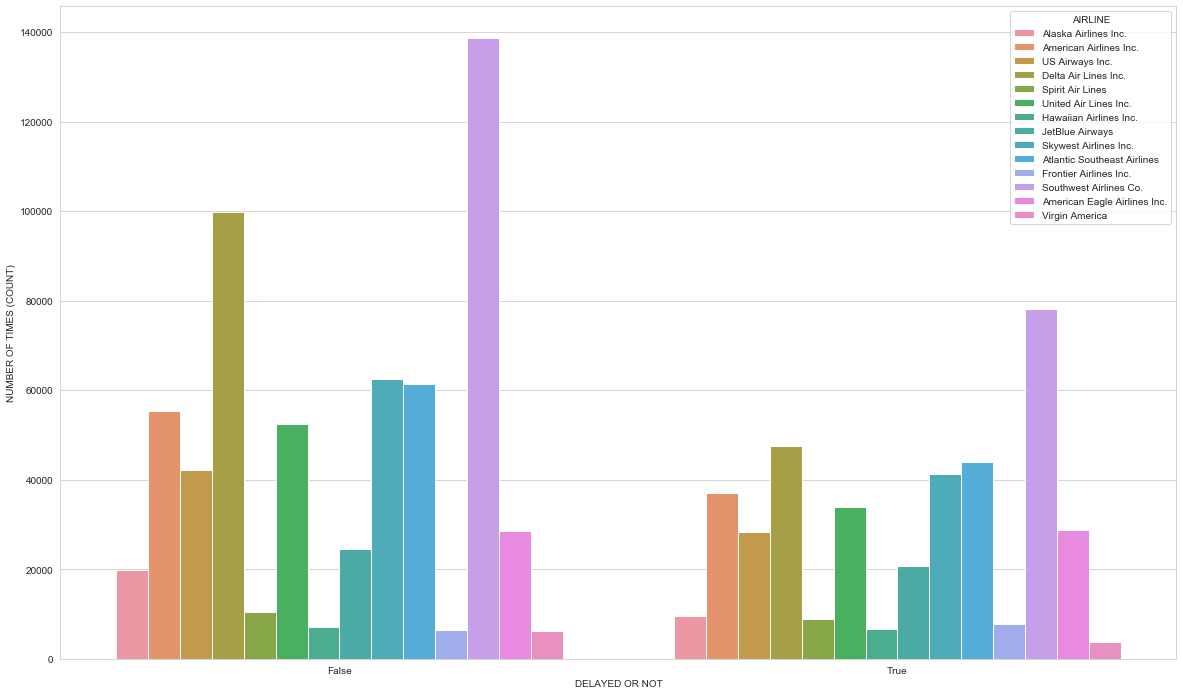

In [54]:
figsize=plt.subplots(figsize=(20,12))
plotGraphway1.countplot(data=flightData, x='isDELAY',hue='AIRLINE')
plt.xlabel("DELAYED OR NOT") 
plt.ylabel("NUMBER OF TIMES (COUNT)") 
plt.show()

In [55]:
Xn=pd.DataFrame(Xn)
importances=modelRandomForest.feature_importances_
importances=pd.DataFrame([Xn.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
w=np.array(importances)
rows, cols = (16, 2) 
arr = [[0 for i in range(cols)] for j in range(rows)] 
i=0
while i<len(arr):
    arr[i][0]=i
    arr[i][1]=round(w[i][1]*100,3)
    i+=1
    
i=0
while i<len(arr):
    arr[i][0]=features[i]
    i+=1
    
imp=[]
i=0
while i<len(arr):
    imp.append(arr[i][1])
    i+=1
arr=np.array(arr)
arr=pd.DataFrame(arr)
arr.columns=[['Features','Effect on Label(%)']]

arr
    


,Features,Effect on Label(%)
0,YEAR,0.0
1,MONTH,0.735
2,DAY,0.275
3,LATE_AIRCRAFT_DELAY,0.332
4,AIRLINE_DELAY,1.574
5,AIR_SYSTEM_DELAY,4.648
6,WEATHER_DELAY,0.075
7,ELAPSED_TIME,1.833
8,DEPARTURE_DELAY,86.002
9,SCHEDULED_TIME,2.05


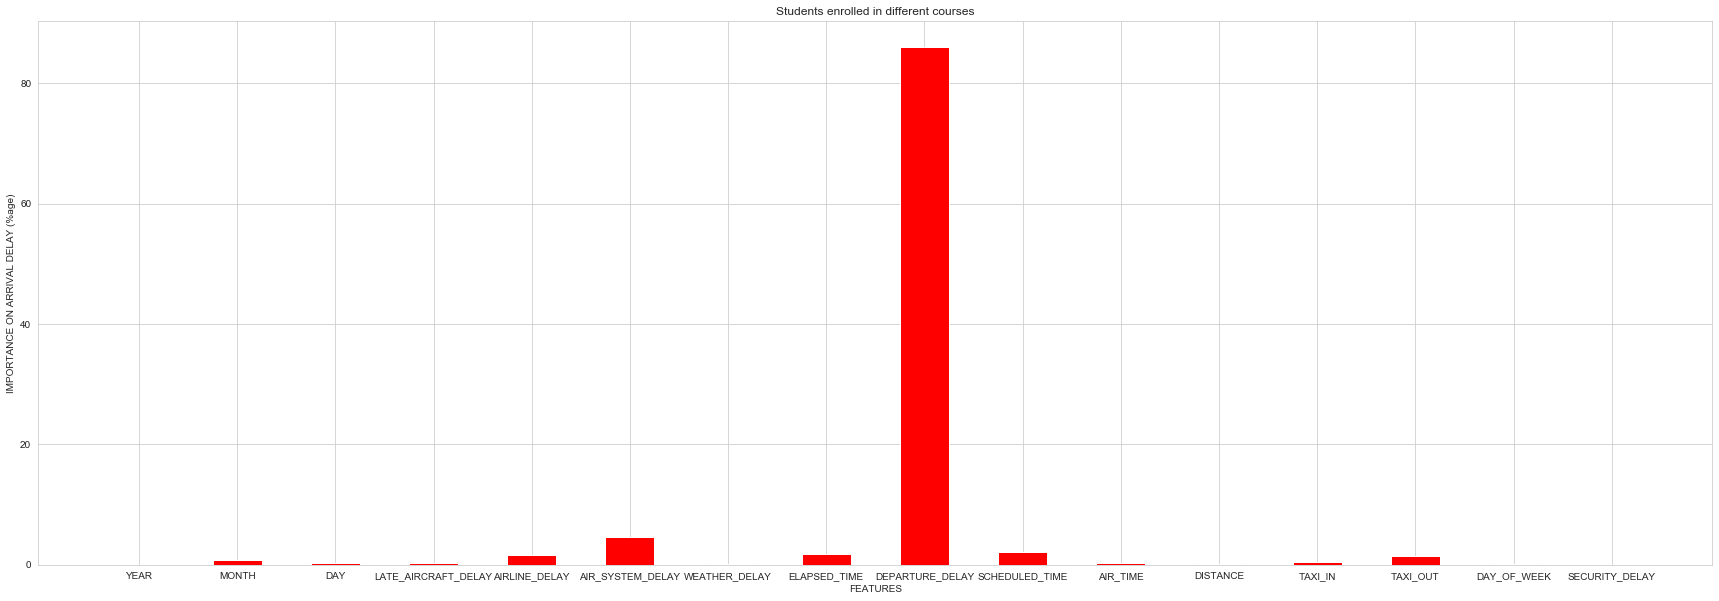

In [56]:
features=list(features)
imp=list(imp)

w=imp
q=features

fig,ax = plt.subplots(figsize = (30, 10)) 
plt.bar(features,imp, color ='red', width = 0.5) 
  
plt.xlabel("FEATURES") 
plt.ylabel("IMPORTANCE ON ARRIVAL DELAY (%age)") 
plt.title("Students enrolled in different courses") 
plt.show() 

The above figure shows that DEPARTURE_DELAY contributes most in predicting the Flight Delay. 

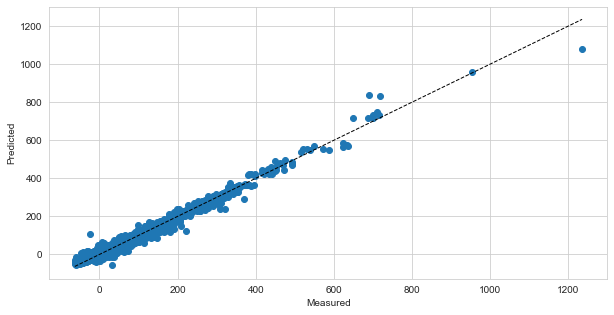

In [84]:
#
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(Y1, predictTestData)
ax.plot([Y1.min(), Y1.max()], [Y1.min(), Y1.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

This graph shows how to use cross_val_predict to visualize prediction errors.

As we have used our Flight Delay Prediction Model on some random test datasets but we also know that most of them have delay due to Departure_Delay due to its high Percentage. This can make the prediction biased or somewhat not proper. So we'll check our model on those datasets who have Departure Delay less than 0. If the Model gives the right score in that datasets this means that our model is good and better.
So let's consider extract those Datasets First.

In [76]:
withoutDeparDelaySets=flightData[(flightData.loc[:,'DEPARTURE_DELAY'] < 0) & (flightData.loc[:,'ARRIVAL_DELAY'] > 59)].head(10)
#ALL flights delayed without Departure Delay are shown
#One of the Flight from the table above for Prediction Model
withoutDDFeatures = withoutDeparDelaySets.loc[:,features]
withoutDDFeatures= withoutDDFeatures.iloc[1]
# Setting the target for our flight index 3221210
Label =withoutDeparDelaySets.iloc[1]['ARRIVAL_DELAY']
Label
withoutDDFeatures

YEAR                   2015.0
MONTH                     2.0
DAY                      13.0
LATE_AIRCRAFT_DELAY       0.0
AIRLINE_DELAY             0.0
AIR_SYSTEM_DELAY         98.0
WEATHER_DELAY             0.0
ELAPSED_TIME            422.0
DEPARTURE_DELAY          -4.0
SCHEDULED_TIME          320.0
AIR_TIME                325.0
DISTANCE               2588.0
TAXI_IN                  74.0
TAXI_OUT                 23.0
DAY_OF_WEEK               5.0
SECURITY_DELAY            0.0
Name: 11700, dtype: float64

In [77]:
predictedValue= modelRandomForest.predict([withoutDDFeatures])

predictedValue


array([98.7])

In [79]:
originalDelay=Label
predictedDelay=predictedValue
print("Predicted Delay of the Flight: ",predictedDelay, " mins")
print("Actual/Original Delay of the Flight: ",originalDelay," mins")

Predicted Delay of the Flight:  [98.7]  mins
Actual/Original Delay of the Flight:  98.0  mins


Difference in the Predicted and Original Delay value is only 0.7 mins which means that are prediction were almost accurate.

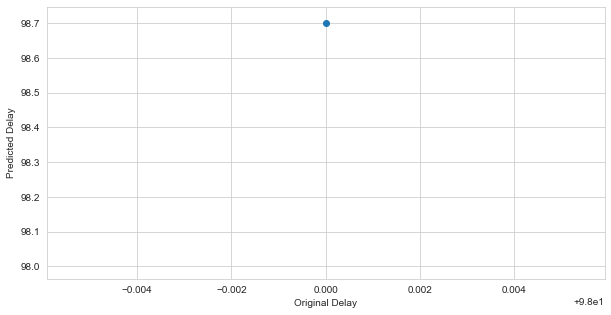

In [85]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(originalDelay, predictedDelay)
ax.plot([originalDelay.min(), originalDelay.max()], [originalDelay.min(), originalDelay.max()], 'k--', lw=1)
ax.set_xlabel('Original Delay')
ax.set_ylabel('Predicted Delay')
plt.show()

Above graph is just an illustration and visually shown Predicted and Original Delay. As there is only one value so it's shown in this way.

To conclude we found out that most of the flights that got delayed were due to Departure Delay which we have shown through different graphs. We have also predicted the Flight Delays using Random Forest Regression Algorithm. We then also made different visualization graphs between Predicted and Original Values just for visualization purposes.


© Copyright Shehroz Wali Khan & Ahmed Yasir DM Project - All Rights are Reserved